 # Midterm Project Notebook 
by: Jessica Arriola 

# Research Question:How does educational attainment impact poverty levels across different demographic groups?

My research will evaluate the relationship between educational attainment and its impact on poverty levels among different demographic groups. I will explore different socioeconomic characterics suchs as race, income levels, and educational attainment among the Los Angeles County population. This notebook will focus on race, educational attainment and income levels. 

# Datasources 



# Importing Libraries 

In [5]:
# I will be using pandas for data exploration 
import pandas as pd
import geopandas as gpd


In [6]:
# First, install the missing package
!pip install contextily

# importing for plots and tables 
import matplotlib.pyplot as plt
import contextily as ctx

# importing for interactive plots 
import plotly.express as px

In [7]:
# I will be importing LACOUNTYTRACTS24
censustracts=gpd.read_file('LACountyTracts24.zip')

In [11]:
# getting the rows and columns 
censustracts.shape


(2533, 206)

In [12]:
censustracts.head()

,ID,NAME,STATE_NAME,ST_ABBREV,AREA,TOTPOP_CY,HHPOP_CY,GQPOP_CY,POPDENS_CY,TOTHH_CY,...,NHSPWHT__1,NHSPBLK__1,NHSPAI_CY_,NHSPASN__1,NHSPPI_CY_,NHSPOTH__1,NHSPMLT__1,HSGRAD_LES,BACHDEG_PL,geometry
0,06037262302,060372623.02,California,CA,1.182838,2782,2765,17,2352.0,1141,...,79.295471,1.042416,0.000000,6.506111,0.000000,1.006470,5.140187,0.824043,83.131362,"POLYGON ((-13187629.788 4038588.873, -13187642..."
1,06037206201,060372062.01,California,CA,0.077543,2863,2202,661,36941.9,1262,...,20.852253,16.590988,1.012924,28.815927,0.419141,0.838282,4.680405,9.677419,45.822994,"POLYGON ((-13162511.881 4035572.196, -13162582..."
2,06037128102,060371281.02,California,CA,0.250507,4755,4521,234,18982.0,1479,...,18.401682,5.005258,0.042061,5.615142,0.147213,0.672976,1.451104,25.774135,17.941712,"POLYGON ((-13184678.486 4053894.2, -13184921.4..."
3,06037131701,060371317.01,California,CA,0.254699,4591,4575,16,18025.1,1741,...,23.175779,5.968199,0.174254,21.367894,0.043563,0.588107,3.724679,17.841079,34.002999,"POLYGON ((-13197317.144 4055820.492, -13197556..."
4,06037232800,060372328.00,California,CA,0.164729,3927,3858,69,23843.4,968,...,0.993125,12.554113,0.254647,0.611154,0.000000,0.891266,1.120448,43.775763,10.634790,"POLYGON ((-13166681.241 4028231.101, -13166681..."


# Cleaning Up the Data 

In [9]:
# selecting the columns I want to keep 
columns_to_keep = ['ID','HISPPOP_CY', 'NHSPWHT_CY', 'NHSPBLK_CY', 'NHSPAI_CY', 'NHSPASN_CY', 'DIVINDX_CY', 'NOHS_CY','SOMEHS_CY', 'HSGRAD_CY', 'GED_CY', 'SMCOLL_CY', 'ASSCDEG_CY', 'BACHDEG_CY', 'GRADDEG_CY', 'EDUCBASECY', 'HINC0_CY', 'HINC15_CY', 'HINC25_CY', 'HINC35_CY', 'HINC50_CY', 'HINC75_CY', 'HINC100_CY', 'HINC150_CY', 'HINC200_CY','geometry']

In [10]:
# creating a new dataframe with the columns i want to keep 
tractsCleaned = censustracts[columns_to_keep]

In [98]:
# renaming the columns I want to keep
tractsCleaned.columns = ['FIPS', 'HISPANIC', 'WHITE', 'BLACK', 'AMERICAN INDIAN', 'ASIAN', 'DIVERSITY', 'NOHS', 'SOMEHS', 'HSGRAD', 'GED', 'SOMECOLL', 'ASSDEG', 'BACH', 'GRAD', 'EDUCBASE', 'LESS15', '15-24', '25-34', '35-49', '50-74', '75-99', '100-149', '150-199', '200MORE', 'geometry']

In [17]:
# checking to make sure the columns were renamed
tractsCleaned.head()

,FIPS,HISPANIC,WHITE,BLACK,AMERICAN INDIAN,ASIAN,DIVERSITY,NOHS,SOMEHS,HSGRAD,...,LESS15,15-24,25-34,35-49,50-74,75-99,100-149,150-199,200MORE,geometry
0,06037262302,195,2206,29,0,181,41.7,17,0,62,...,100,0,55,16,34,56,136,84,660,"POLYGON ((-13187629.788 4038588.873, -13187642..."
1,06037206201,767,597,475,29,825,87.0,23,211,367,...,347,173,67,124,68,83,138,171,91,"POLYGON ((-13162511.881 4035572.196, -13162582..."
2,06037128102,3265,875,238,2,267,82.8,606,243,915,...,73,156,143,227,319,194,249,88,30,"POLYGON ((-13184678.486 4053894.2, -13184921.4..."
3,06037131701,2064,1064,274,8,981,88.5,309,286,747,...,104,138,101,113,217,203,398,138,329,"POLYGON ((-13197317.144 4055820.492, -13197556..."
4,06037232800,3282,39,493,10,24,71.7,797,265,572,...,170,138,100,77,87,101,154,80,61,"POLYGON ((-13166681.241 4028231.101, -13166681..."


In [19]:
tractsCleaned.columns.to_list()

['FIPS',
 'HISPANIC',
 'WHITE',
 'BLACK',
 'AMERICAN INDIAN',
 'ASIAN',
 'DIVERSITY',
 'NOHS',
 'SOMEHS',
 'HSGRAD',
 'GED',
 'SOMECOLL',
 'ASSDEG',
 'BACH',
 'GRAD',
 'EDUCBASE',
 'LESS15',
 '15-24',
 '25-34',
 '35-49',
 '50-74',
 '75-99',
 '100-149',
 '150-199',
 '200MORE',
 'geometry']

In [20]:
tractsCleaned.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2533 entries, 0 to 2532
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   FIPS             2533 non-null   object  
 1   HISPANIC         2533 non-null   int64   
 2   WHITE            2533 non-null   int64   
 3   BLACK            2533 non-null   int64   
 4   AMERICAN INDIAN  2533 non-null   int64   
 5   ASIAN            2533 non-null   int64   
 6   DIVERSITY        2533 non-null   float64 
 7   NOHS             2533 non-null   int64   
 8   SOMEHS           2533 non-null   int64   
 9   HSGRAD           2533 non-null   int64   
 10  GED              2533 non-null   int64   
 11  SOMECOLL         2533 non-null   int64   
 12  ASSDEG           2533 non-null   int64   
 13  BACH             2533 non-null   int64   
 14  GRAD             2533 non-null   int64   
 15  EDUCBASE         2533 non-null   int64   
 16  LESS15           2533 non-null   i

In [21]:
tractsCleaned.describe()

,HISPANIC,WHITE,BLACK,AMERICAN INDIAN,ASIAN,DIVERSITY,NOHS,SOMEHS,HSGRAD,GED,...,EDUCBASE,LESS15,15-24,25-34,35-49,50-74,75-99,100-149,150-199,200MORE
count,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,...,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000
mean,1912.333597,959.699171,287.457560,7.103829,598.900908,75.357442,290.361627,194.931307,531.593762,58.018950,...,2792.352941,122.585077,80.701145,81.739834,115.664430,189.564153,168.043822,240.512041,146.752862,234.399131
std,1321.468980,986.664479,456.497764,6.872504,725.789841,12.080802,265.344294,161.133130,301.745829,51.187861,...,1010.214120,103.182232,58.730436,52.964665,69.562509,97.979745,89.246322,134.776600,104.201923,245.669171
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,785.000000,171.000000,55.000000,3.000000,147.000000,68.400000,65.000000,65.000000,308.000000,19.000000,...,2132.000000,55.000000,37.000000,43.000000,65.000000,121.000000,109.000000,149.000000,74.000000,61.000000
50%,1713.000000,585.000000,130.000000,5.000000,366.000000,79.100000,221.000000,162.000000,501.000000,47.000000,...,2704.000000,97.000000,70.000000,72.000000,106.000000,174.000000,154.000000,219.000000,128.000000,152.000000
75%,2807.000000,1501.000000,304.000000,10.000000,733.000000,84.600000,453.000000,289.000000,716.000000,83.000000,...,3383.000000,161.000000,108.000000,111.000000,156.000000,244.000000,214.000000,313.000000,200.000000,333.000000
max,7303.000000,8753.000000,4690.000000,89.000000,5901.000000,90.100000,1571.000000,1534.000000,1987.000000,454.000000,...,11072.000000,1087.000000,499.000000,569.000000,549.000000,697.000000,763.000000,2017.000000,1069.000000,2569.000000


<Axes: >

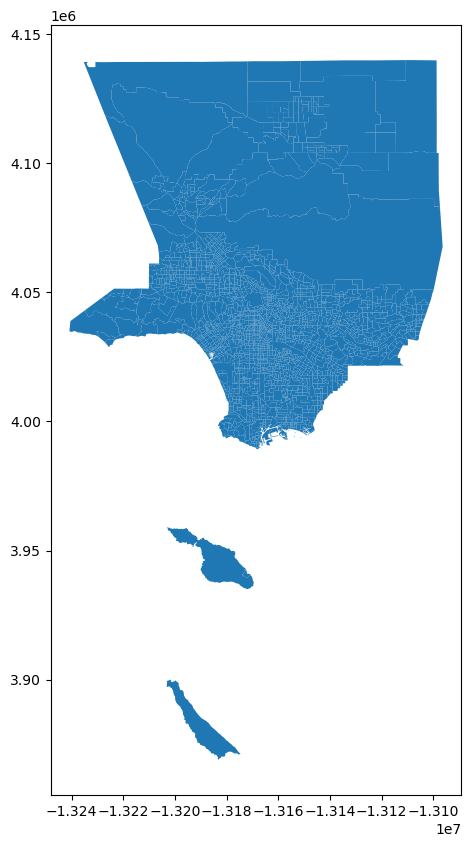

In [22]:
# plot census tracts 
tractsCleaned.plot(figsize=(12,10))

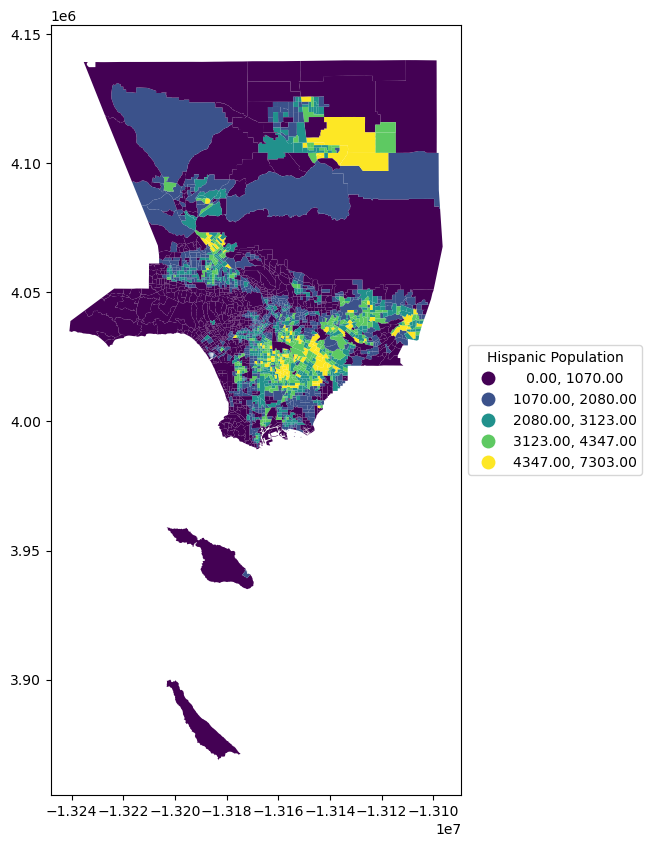

In [25]:
# Hispanic Population in the County of Los Angeles 
tractsCleaned.plot(figsize=(12,10),
            column='HISPANIC',
            legend=True,
            scheme='NaturalBreaks',
  legend_kwds={'loc': 'center left', 'title': 'Hispanic Population', 'bbox_to_anchor': (1,0.50)})

plt.savefig('HISPANIC.png')


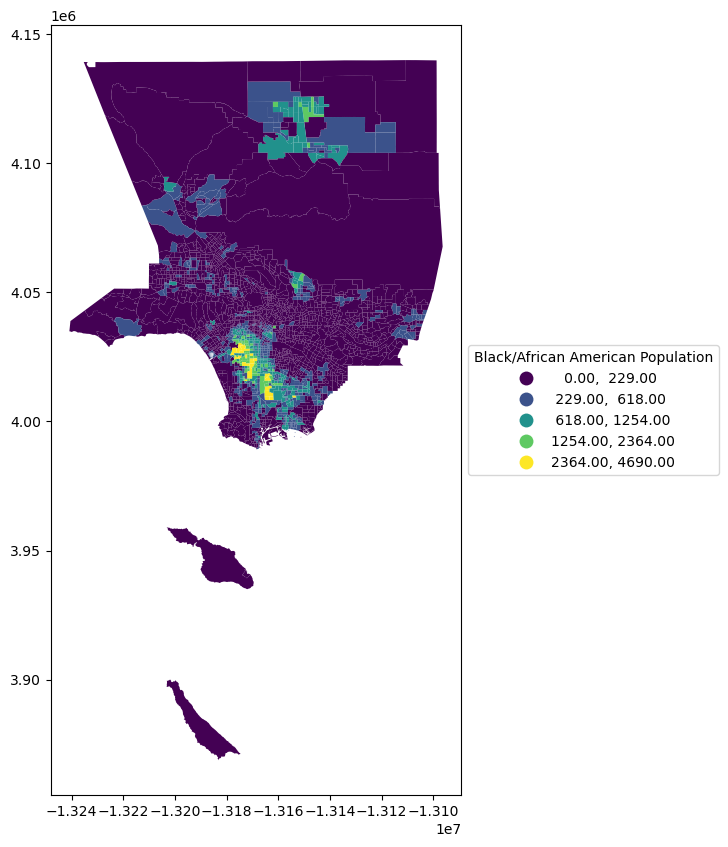

In [26]:
# Black/ African American Population in the County of Los Angeles 
tractsCleaned.plot(figsize=(12,10),
            column='BLACK',
            legend=True,
            scheme='NaturalBreaks',
  legend_kwds={'loc': 'center left', 'title': 'Black/African American Population', 'bbox_to_anchor': (1,0.50)})

plt.savefig('BLACK.png')

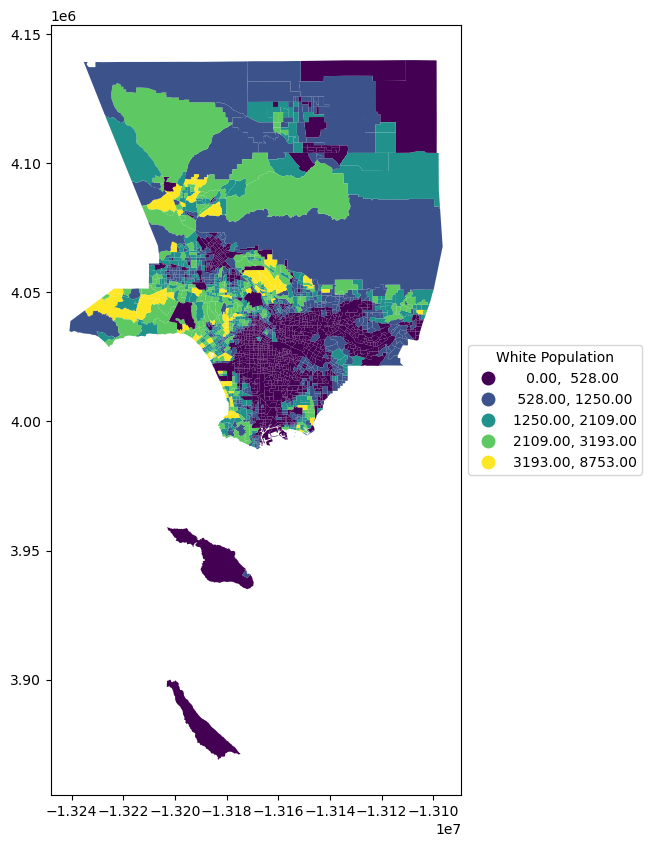

In [27]:
# White American Population in the County of Los Angeles 
tractsCleaned.plot(figsize=(12,10),
            column='WHITE',
            legend=True,
            scheme='NaturalBreaks',
  legend_kwds={'loc': 'center left', 'title': 'White Population', 'bbox_to_anchor': (1,0.50)})

plt.savefig('White.png')

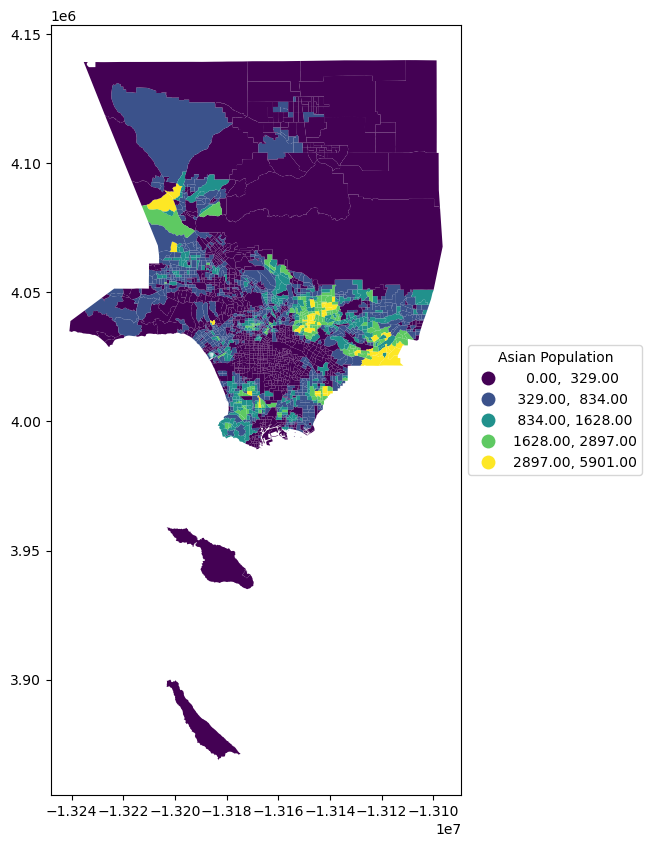

In [34]:
# Aisan Population in the County of Los Angeles 
tractsCleaned.plot(figsize=(12,10),
            column='ASIAN',
            legend=True,
            scheme='NaturalBreaks',
  legend_kwds={'loc': 'center left', 'title': 'Asian Population', 'bbox_to_anchor': (1,0.50)})

plt.savefig('Asian.png')

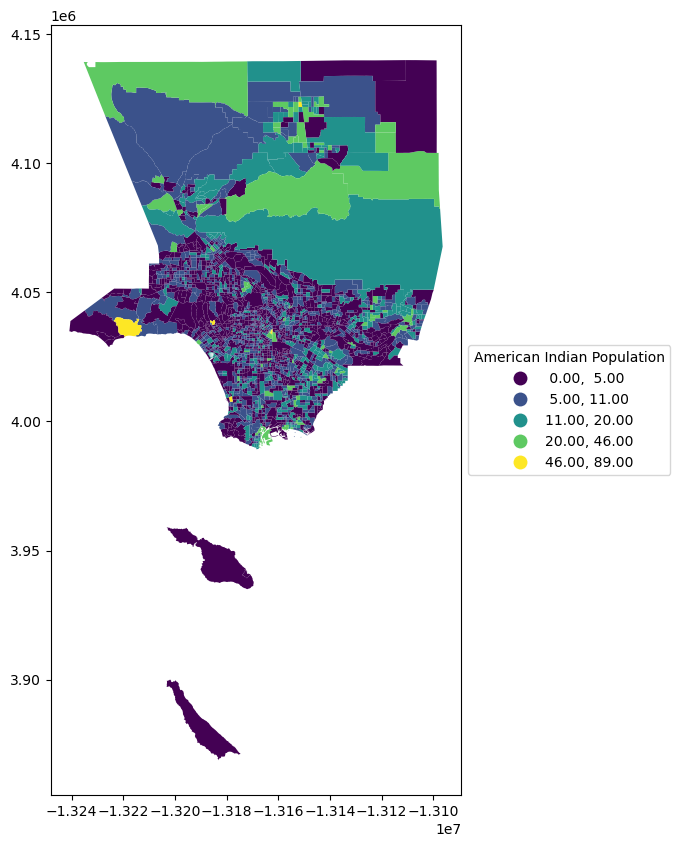

In [36]:
# American Indian Population in the County of Los Angeles 
tractsCleaned.plot(figsize=(12,10),
            column='AMERICAN INDIAN',
            legend=True,
            scheme='NaturalBreaks',
  legend_kwds={'loc': 'center left', 'title': 'American Indian Population', 'bbox_to_anchor': (1,0.50)})

plt.savefig('AIndian.png')

In [38]:
# Finding the total of each race 
print(tractsCleaned['WHITE'].sum())
print(tractsCleaned['BLACK'].sum())
print(tractsCleaned['ASIAN'].sum())
print(tractsCleaned['HISPANIC'].sum())
print(tractsCleaned['AMERICAN INDIAN'].sum())


2430918
728130
1517016
4843941
17994


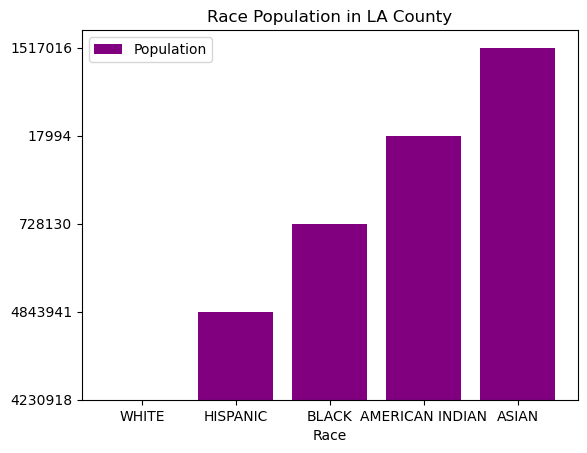

<Figure size 640x480 with 0 Axes>

In [49]:
x = ["WHITE", "HISPANIC","BLACK","AMERICAN INDIAN","ASIAN"]
y = ['4230918', '4843941', '728130', '17994', '1517016']

plt.bar(x,y,label="Population",color="purple")

plt.xlabel("Race")
plt.title("Race Population in LA County")
plt.legend()
plt.show()
plt.savefig('race.png')


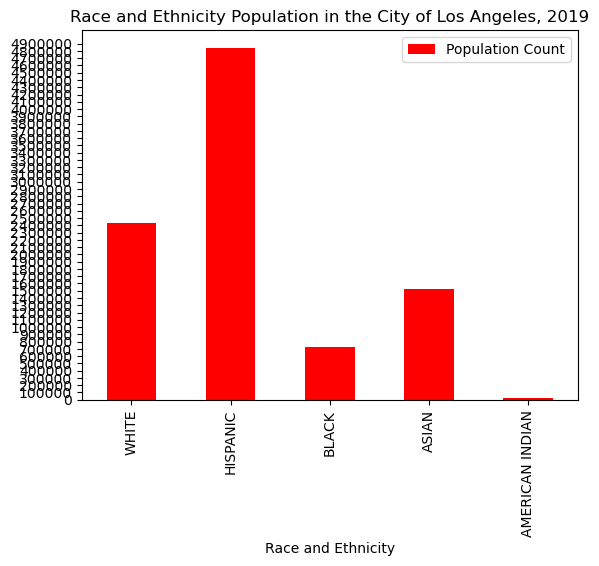

In [99]:
tractsCleaned = tractsCleaned1 = pd.DataFrame({'Race and Ethnicity':['WHITE', 'HISPANIC', 'BLACK', 'ASIAN', 'AMERICAN INDIAN'], 
                   'Population Count':[2430918, 4843941, 728130, 1517016, 17994], 
                   'Color':['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']})
                                  
ax = tractsCleaned.plot.bar(x='Race and Ethnicity', 
               y='Population Count', 
               title='Race and Ethnicity Population in the City of Los Angeles, 2019',
               color='red')

yticks = range(0, max(tractsCleaned['Population Count']) + 100000, 100000)
ax.set_yticks(yticks)
ax.set_yticklabels([f'{int(tick / 1)}' for tick in yticks])

plt.savefig('bar_chart1.png')

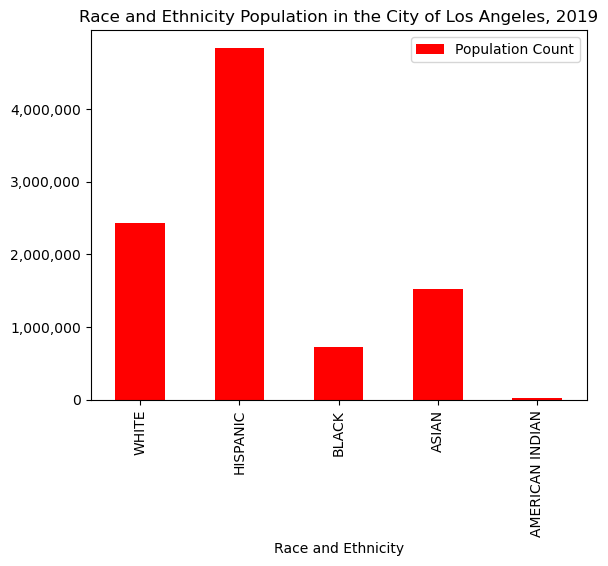

In [101]:
tractsCleaned = tractsCleaned1 = pd.DataFrame({'Race and Ethnicity':['WHITE', 'HISPANIC', 'BLACK', 'ASIAN', 'AMERICAN INDIAN'], 
                   'Population Count':[2430918, 4843941, 728130, 1517016, 17994], 
                   'Color':['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']})
                                  
ax = tractsCleaned.plot.bar(x='Race and Ethnicity', 
               y='Population Count', 
               title='Race and Ethnicity Population in the City of Los Angeles, 2019',
               color='red')


yticks = range(0, max(tractsCleaned['Population Count']) + 100000, 1000000) 
ax.set_yticks(yticks)


import matplotlib.ticker as ticker
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{int(x):,}')) 

plt.savefig('bar_chart1.png')

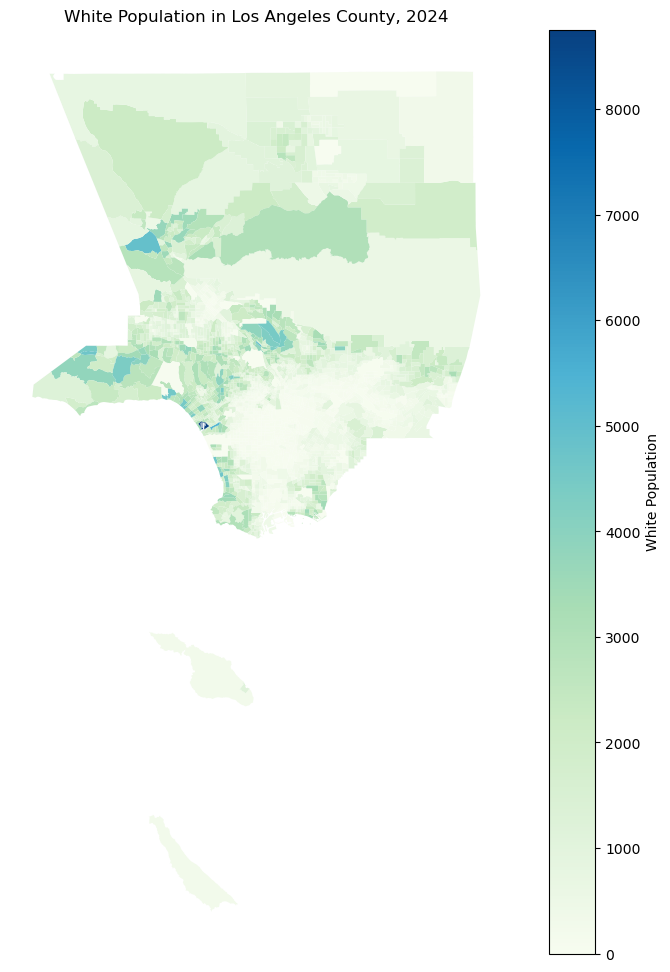

In [63]:
# making maps using matplotlib , #White Residents in LA County

fig,ax = plt.subplots(figsize=(12,12))

tractsCleaned.plot(ax=ax,column='WHITE',legend=True,cmap='GnBu',
             legend_kwds={"label": "White Population", "orientation": "vertical"})

ax.axis('off')
ax.set_title('White Population in Los Angeles County, 2024')

plt.savefig("WHITEPOP.png")

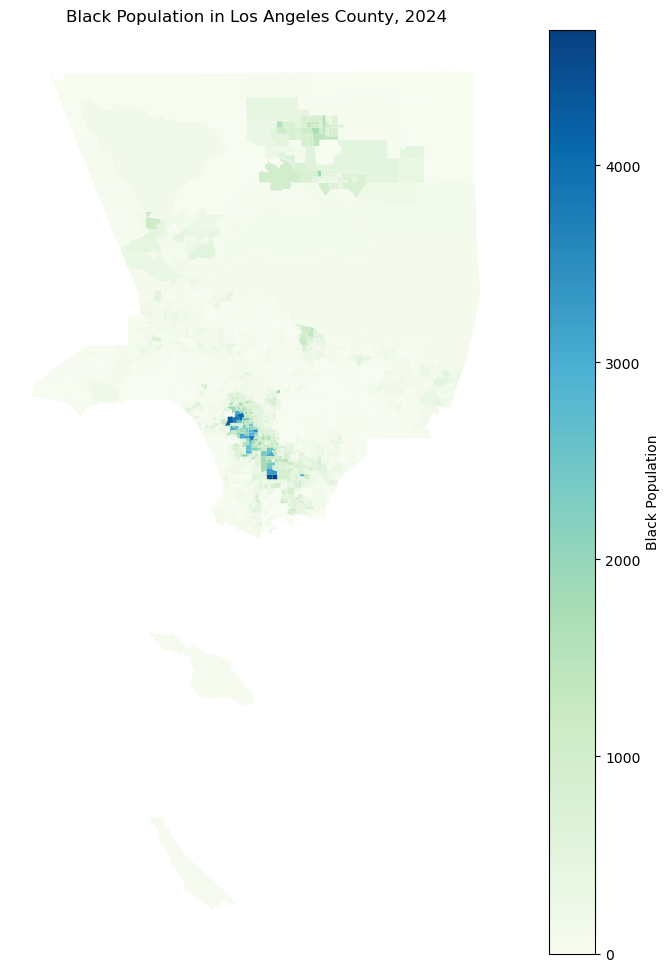

In [64]:
# making maps using matplotlib , #White Residents in LA County

fig,ax = plt.subplots(figsize=(12,12))

tractsCleaned.plot(ax=ax,column='BLACK',legend=True,cmap='GnBu',
             legend_kwds={"label": "Black Population", "orientation": "vertical"})

ax.axis('off')
ax.set_title('Black Population in Los Angeles County, 2024')

plt.savefig("Black.png")

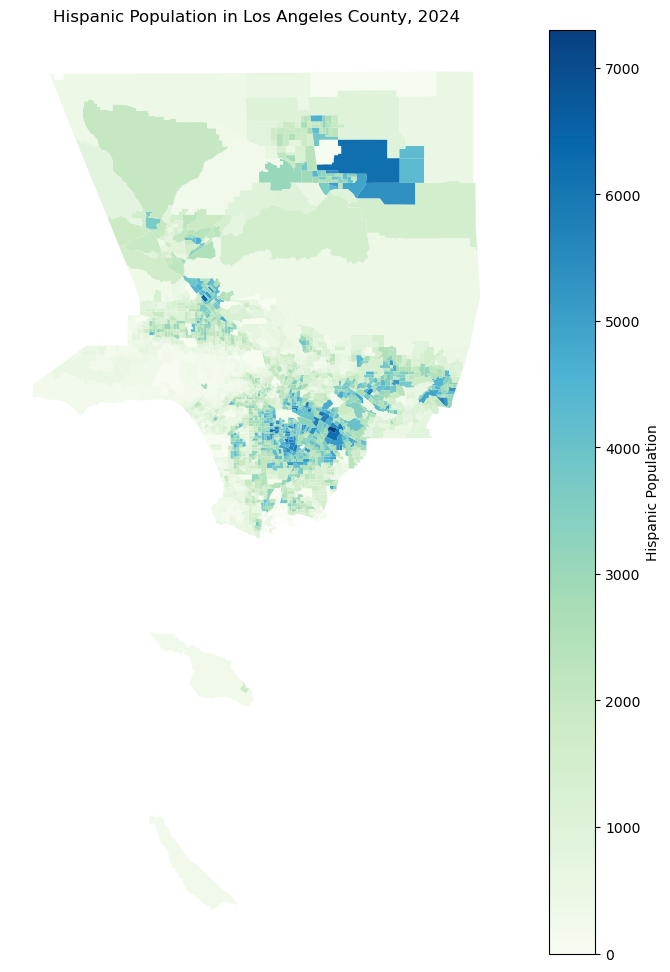

In [65]:
# making maps using matplotlib , #White Residents in LA County

fig,ax = plt.subplots(figsize=(12,12))

tractsCleaned.plot(ax=ax,column='HISPANIC',legend=True,cmap='GnBu',
             legend_kwds={"label": "Hispanic Population", "orientation": "vertical"})

ax.axis('off')
ax.set_title('Hispanic Population in Los Angeles County, 2024')

plt.savefig("HISPANICPOP.png")

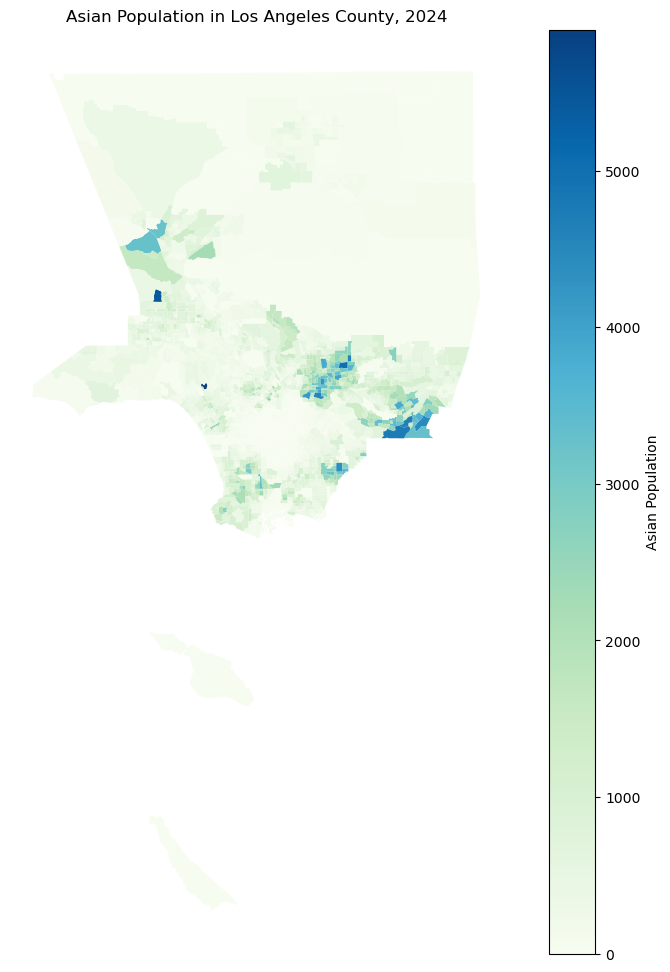

In [67]:
# making maps using matplotlib , #White Residents in LA County

fig,ax = plt.subplots(figsize=(12,12))

tractsCleaned.plot(ax=ax,column='ASIAN',legend=True,cmap='GnBu',
             legend_kwds={"label": "Asian Population", "orientation": "vertical"})

ax.axis('off')
ax.set_title('Asian Population in Los Angeles County, 2024')

plt.savefig("ASIANPOP.png")

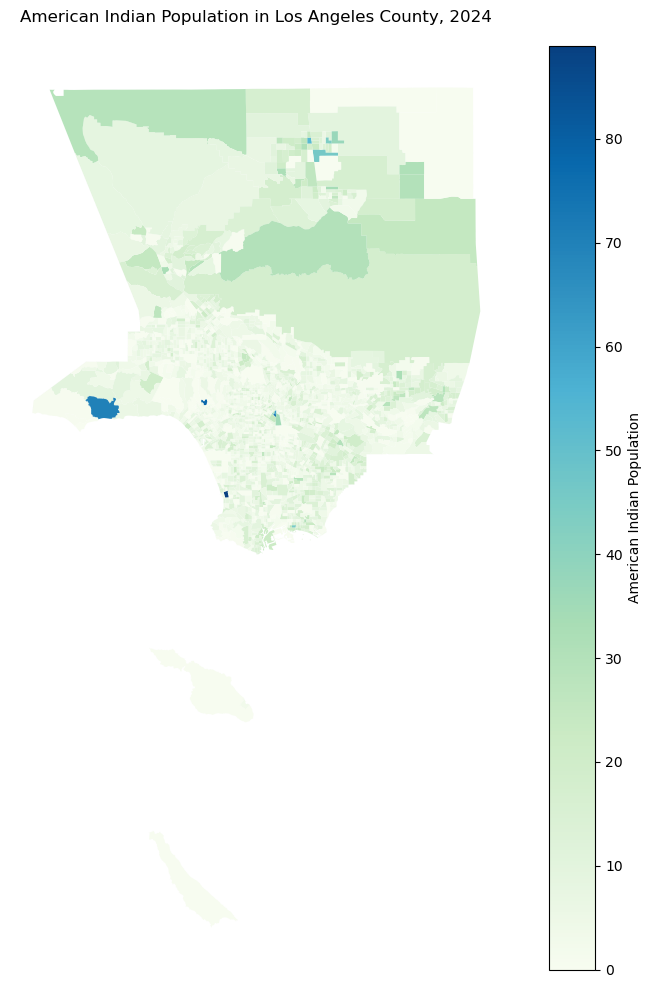

In [68]:
# making maps using matplotlib , #White Residents in LA County

fig,ax = plt.subplots(figsize=(12,12))

tractsCleaned.plot(ax=ax,column='AMERICAN INDIAN',legend=True,cmap='GnBu',
             legend_kwds={"label": "American Indian Population", "orientation": "vertical"})

ax.axis('off')
ax.set_title('American Indian Population in Los Angeles County, 2024')

plt.savefig("AmericanIndian.png")

In [69]:

# Finding the total of EDUCATIONAL ATTAINMENT 
print(tractsCleaned['NOHS'].sum())
print(tractsCleaned['SOMEHS'].sum())
print(tractsCleaned['HSGRAD'].sum())
print(tractsCleaned['GED'].sum())
print(tractsCleaned['SOMECOLL'].sum())
print(tractsCleaned['ASSDEG'].sum())
print(tractsCleaned['BACH'].sum())
print(tractsCleaned['GRAD'].sum())


735486
493761
1346527
146962
1139514
526551
1739665
944564


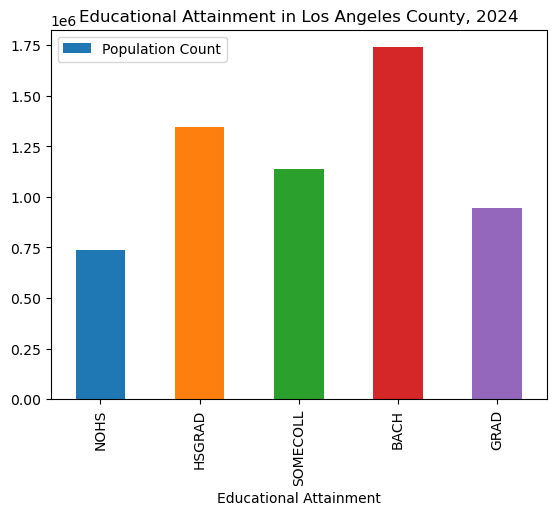

In [102]:

tractsCleaned = pd.DataFrame({
    'Educational Attainment': ['NOHS', 'HSGRAD', 'SOMECOLL', 'BACH','GRAD'], 
    'Population Count': [735486, 1346527, 1139514, 1739665, 944564],
    'Color': ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
})
                                  

ax = tractsCleaned.plot.bar(
    x='Educational Attainment', 
    y='Population Count', 
    title='Educational Attainment in Los Angeles County, 2024',
    color=tractsCleaned['Color']  
)  


plt.savefig("edu.png")

In [81]:
columns_to_keep = ['ID','HISPPOP_CY', 'NHSPWHT_CY', 'NHSPBLK_CY', 'NHSPAI_CY', 'NHSPASN_CY', 'DIVINDX_CY', 'NOHS_CY','SOMEHS_CY', 'HSGRAD_CY', 'GED_CY', 'SMCOLL_CY', 'ASSCDEG_CY', 'BACHDEG_CY', 'GRADDEG_CY', 'EDUCBASECY', 'HINC0_CY', 'HINC15_CY', 'HINC25_CY', 'HINC35_CY', 'HINC50_CY', 'HINC75_CY', 'HINC100_CY', 'HINC150_CY', 'HINC200_CY','geometry']

In [82]:
tractsCleaned = censustracts[columns_to_keep]

In [85]:
tractsCleaned.columns = ['FIPS', 'HISPANIC', 'WHITE', 'BLACK', 'AMERICAN INDIAN', 'ASIAN', 'DIVERSITY', 'NOHS', 'SOMEHS', 'HSGRAD', 'GED', 'SOMECOLL', 'ASSDEG', 'BACH', 'GRAD', 'EDUCBASE', 'LESS15', '15-24', '25-34', '35-49', '50-74', '75-99', '100-149', '150-199', '200MORE', 'geometry']

In [87]:
# Finding the total of Income levels 
print(tractsCleaned['LESS15'].sum())
print(tractsCleaned['25-34'].sum())
print(tractsCleaned['35-49'].sum())
print(tractsCleaned['50-74'].sum())
print(tractsCleaned['75-99'].sum())
print(tractsCleaned['100-149'].sum())
print(tractsCleaned['150-199'].sum())
print(tractsCleaned['200MORE'].sum())


310508
207047
292978
480166
425655
609217
371725
593733


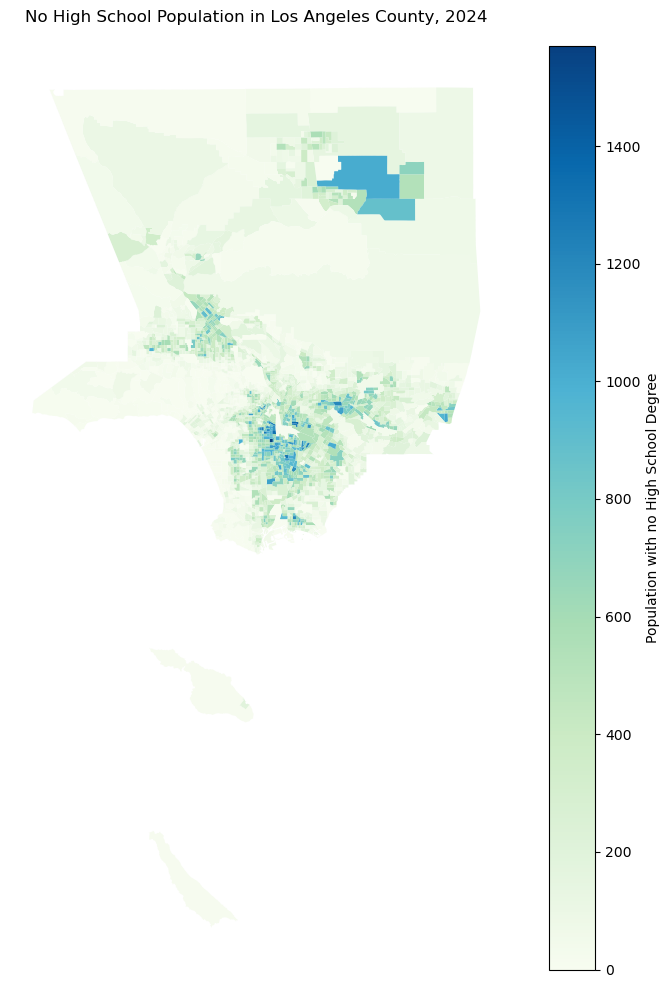

In [89]:
# making maps using matplotlib , #No High School in LA County

fig,ax = plt.subplots(figsize=(12,12))

tractsCleaned.plot(ax=ax,column='NOHS',legend=True,cmap='GnBu',
             legend_kwds={"label": "Population with no High School Degree", "orientation": "vertical"})

ax.axis('off')
ax.set_title('No High School Population in Los Angeles County, 2024')

plt.savefig("No High School.png")

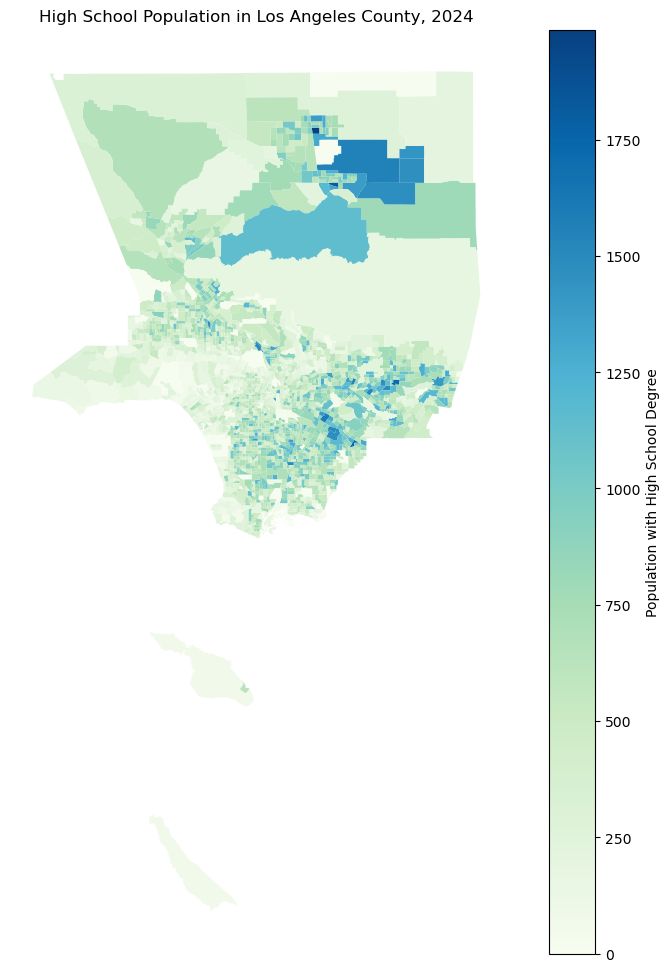

In [92]:
# making maps using matplotlib , #High School in LA County

fig,ax = plt.subplots(figsize=(12,12))

tractsCleaned.plot(ax=ax,column='HSGRAD',legend=True,cmap='GnBu',
             legend_kwds={"label": "Population with High School Degree", "orientation": "vertical"})

ax.axis('off')
ax.set_title('High School Population in Los Angeles County, 2024')

plt.savefig("High School.png")

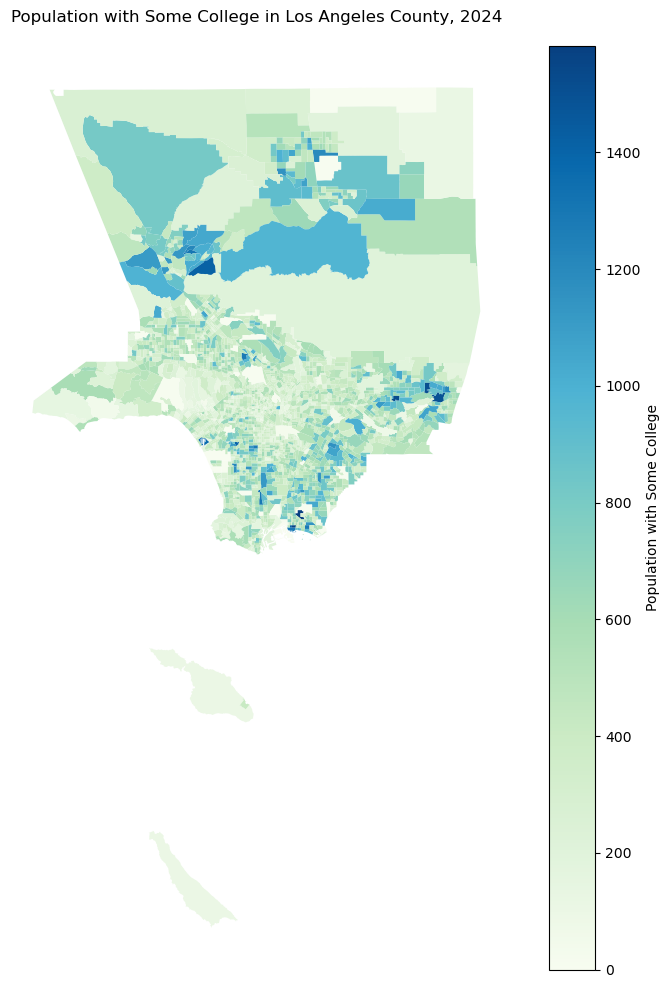

In [93]:
# making maps using matplotlib with Some College in LA County

fig,ax = plt.subplots(figsize=(12,12))

tractsCleaned.plot(ax=ax,column='SOMECOLL',legend=True,cmap='GnBu',
             legend_kwds={"label": "Population with Some College", "orientation": "vertical"})

ax.axis('off')
ax.set_title('Population with Some College in Los Angeles County, 2024')

plt.savefig("somecollege.png")

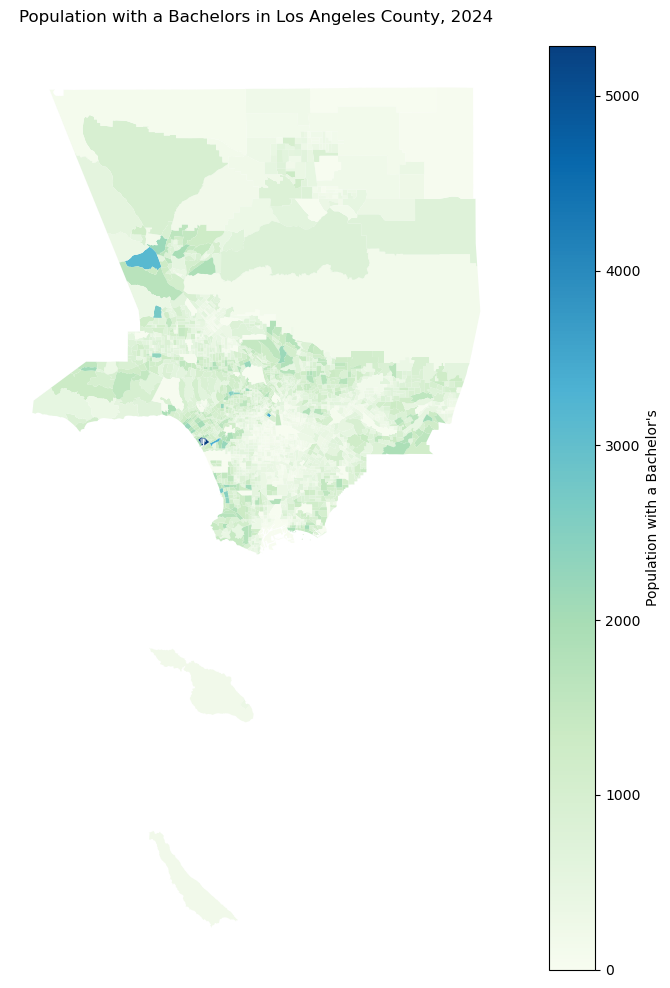

In [94]:
# making maps using matplotlib with a Bachelor's Degree in LA County

fig,ax = plt.subplots(figsize=(12,12))

tractsCleaned.plot(ax=ax,column='BACH',legend=True,cmap='GnBu',
             legend_kwds={"label": "Population with a Bachelor's", "orientation": "vertical"})

ax.axis('off')
ax.set_title('Population with a Bachelors in Los Angeles County, 2024')

plt.savefig("bach.png")

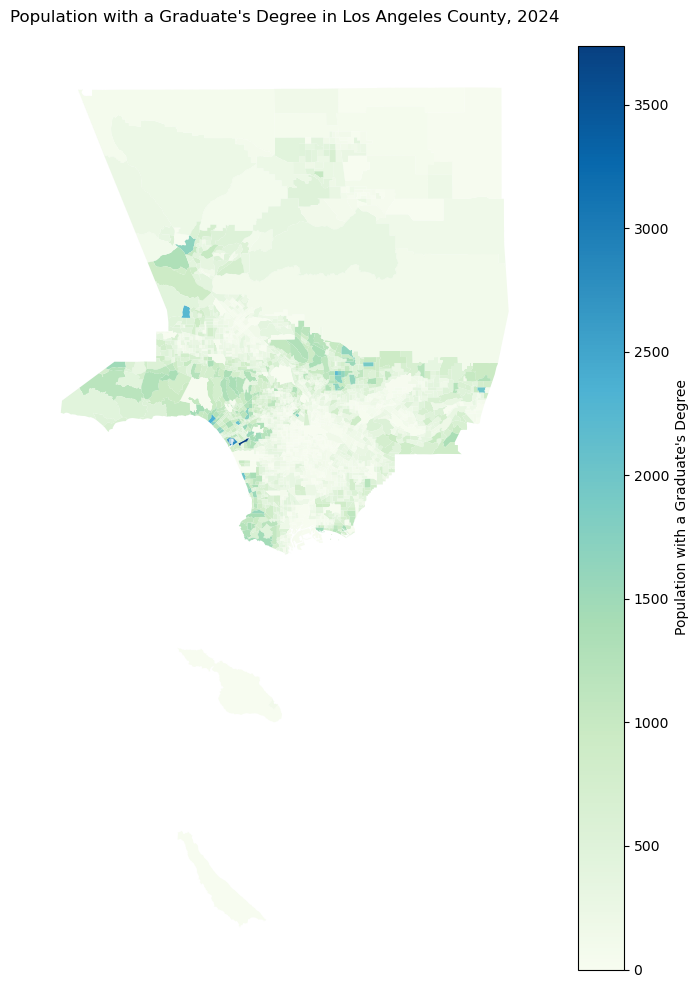

In [97]:
# making maps using matplotlib with Graduate Degree in LA County

fig,ax = plt.subplots(figsize=(12,12))

tractsCleaned.plot(ax=ax,column='GRAD',legend=True,cmap='GnBu',
             legend_kwds={"label": "Population with a Graduate's Degree", "orientation": "vertical"})

ax.axis('off')
ax.set_title("Population with a Graduate's Degree in Los Angeles County, 2024") 

plt.savefig("grad.png")